In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from pathlib import Path, PureWindowsPath
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans dataframe

In [4]:
# corpus["message"].duplicated()
# corpus_doublons = corpus[corpus.duplicated(["message"], keep=False)]
corpus.sort_values("message").reset_index(drop=True)

NameError: name 'corpus' is not defined

In [2]:
path = PureWindowsPath(os.getcwd() + "\\data\\input\\data.parquet")
path = path.as_posix()
corpus = pd.read_parquet(path) #engine="fastparquet"
corpus["category_bin"] = np.select([corpus["category"] == "philosophy"], [1], default=0)
corpus = corpus.sample(frac=1).reset_index(drop=True)
# corpus["category_bin"] = (corpus["category_bin"] == "philosophy")
# corpus

#preprocessing qui aurait du etre fait avant :
#enlever les retours a la ligne
corpus.replace("\\n", " ", regex=True, inplace=True)

#supprimer les doublons
print("corpus.shape =", corpus.shape)
corpus.drop_duplicates("message", inplace=True, keep="first")
print("corpus.shape =", corpus.shape)

# corpus.shape = (4007, 6) si False
# corpus.shape = (4649, 6) si first


corpus.shape = (8228, 6)
corpus.shape = (4649, 6)


In [3]:
zeros_subset = corpus.loc[corpus["category_bin"] == 0, :]
ones_subset = corpus.loc[corpus["category_bin"] == 1, :]
number_of_minority_class = len(zeros_subset)
sampled_ones = ones_subset.sample(number_of_minority_class)
print(sampled_ones.shape)
corpus = pd.concat([sampled_ones, zeros_subset], ignore_index=True)
corpus = corpus.sample(frac=1).reset_index(drop=True)
corpus.index = list(range(len(corpus)))
corpus["id"] = corpus.index	#creation de l'id seulement apres equilibrage des classes et melange aleatoire
print(corpus["category_bin"].value_counts())

(1823, 6)
1    1823
0    1823
Name: category_bin, dtype: int64


In [4]:
corpus

,id,message,message_preprocessed,category,length,category_bin
0,0,"La semaine dernière, nous avons abordé le souci qu’il y a de décrire un Dieu qui non seulement n’a pas de langage particulier, mais a toutes les raisons de se situer au-delà de toutes les limites de nos langages. Thomas a alors montré que oui nous pouvons nommer Dieu, que nous nommions bien ce qu’il est, et surtout, que ce langage était une analogie: quand je dis: « Dieu est mon père », je définis la « paternité de Dieu » à partir de la paternité de F. Omnès mon père. Dans cet article, nous allons tâcher de conclure ce que l’on appelle le traité des noms divins, soit la question 13 de la Summa. Que le Seigneur m’assiste, car la vulgarisation de ces notions n’est pas évidente.",semaine dernier abordé souci a décrire dieu non seulement a langage particulier a toutes raison situer au-delà toutes limite langage thomas a alors montré oui pouvons nommer dieu nommions bien surtout langage analogie quand dis « dieu père » défini « paternité dieu » partir paternité f omnès père cet article allons tâcher conclure appelle traité nom divin question summa seigneur assiste car vulgarisation notion évidente,philosophy,684,1
1,1,Pour le jeu de belote? Allez! Cause finale: Jouer (qui est une notion surprenamment riche en théologie) Cause formelle: l’ensemble de règles du jeu de belotes Cause matérielle: le jeu de cartes matériel et concret Cause efficace: les joueurs.,jeu belote allez cause finale jouer notion surprenamment riche théologie cause formelle ensemble règle jeu belote cause matérielle jeu carte matériel concret cause efficace joueur,philosophy,250,1
2,2,"> Il est dit en Matthieu (25.46) que les justes « iront dans la vie éternelle > », vie qui n’est autre, comme nous l’avons dit, que la béatitude des saints. > Or ce qui est éternel ne disparaît pas. Donc la béatitude ne peut pas être > perdue.",dit matthieu juste « iront vie éternelle » vie autre comme dit béatitude saint or éternel disparaît donc béatitude peut être perdue,philosophy,243,1
3,3,"> Augustin déclare » Quiconque aura trouvé dans notre Chef des mérites qui > aient précédé sa génération sans pareille, qu’il cherche en nous, ses > membres, des mérites qui aient précédé nos innombrables régénérations ! » > Mais notre génération n’est précédé d’aucun mérite selon S. Paul (Tt 3, 5) : > « Ce n’est pas à cause d’oeuvres de justice que nous aurions accomplies par > nous-mêmes, mais selon sa miséricorde qu’il nous a sauvés par le bain de la > régénération. » Donc aucun mérite non plus n’a précédé la génération du > Christ.",augustin déclare » quiconque trouvé chef mérite précédé génération sans pareille cherche membre mérite précédé innombrables régénération » génération précédé aucun mérite selon paul tt « cause oeuvre justice accomplies nous-mêmes selon miséricorde a sauvés bain régénération » donc aucun mérite non plus a précédé génération christ,philosophy,541,1
4,4,"La science de Dieu est-elle linéaire, une pensée après l’autre ?",science dieu est-elle linéaire pensée après autre,philosophy,64,1
...,...,...,...,...,...,...
3641,3641,"[Quand guignol fait de l’intertextualité de l’ancien testament ](http://leboncombat.fr/intertextualite-ancien-testament/) (alliance des œuvres, Esaïe 24)",quand guignol fait intertextualité ancien testament httpleboncombatfrintertextualite-ancien-testament alliance œuvres esaïe,baptism,153,0
3642,3642,Le problème est que Jésus rejette ouvertement la conclusion dans ce que nous avons déjà cité :,problème jésus rejette ouvertement conclusion déjà cité,philosophy,94,1
3643,3643,"Si vous êtes comme moi, que vous avez toujours utilisé le mot Dieu sans jamais savoir au juste ce que signifiaient ses quatre lettres, écoutez donc Jean le Damascène:",si comme toujours utilisé mot dieu sans jamais savoir juste signifiaient quatre lettre écoutez donc jean damascène,philosophy,166,1
3644,3644,"En revanche, si nous le connaissons assez, nous verrons aussi plus facilement ce qu’il fait. Plus 

In [4]:
X = corpus["message_preprocessed"]
y = corpus["category"]
y = corpus["category_bin"]
indices = corpus["id"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.33, random_state=42)
# y_train.value_counts()
# print(indices_train, indices_test)
# indices_test

In [5]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, cross_val_score 

# Cross validation
#Methode version automatisee facile grace a la fonction RepeatedStratifiedKFold de sklearn
#Selection de modeles avec la k cross validation pour determiner le meilleur
#Modeles utilisés dans les papiers :
# LogisticRegression, MultinomialNB (= naive bayes), SVM (SVD petit data), SGDClassifier (SVD grand data)
# DecisionTreeClassifier, RandomForestClassifier
# AdaBoostClassifier, MLPClassifier
pd.set_option("display.precision", 2)
scoring = ['accuracy', 'precision', 'recall', 'f1']
# scoring = ['accuracy']
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
# models.append(('MLPClassifier', MLPClassifier(max_iter=500)))
models.append(('SGDClassifier', SGDClassifier()))
models.append(('SVM', SVC()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
 
# evaluate each model in turn
results = []
names = []
num_iter = 2
for name, model in models:
    sum_test_accuracy = 0
    sum_test_f1 = 0
    sum_test_recall = 0
    sum_test_precision = 0
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=num_iter, random_state=None)
    cv_results = cross_validate(model, X_train_tfidf, y_train, cv=kfold, scoring=scoring)
    for k, scores in cv_results.items():
        cv_results[k] = round(np.mean(scores), 4) #on fait la moyenne de chaque score (rappel, precision, etc.) pour les k experiences
    print((str(list(cv_results.items())[2:])+" ({0})").format(name)) #2: pour ignorer les info inutiles

[('test_accuracy', 0.9498), ('test_precision', 0.9564), ('test_recall', 0.9415), ('test_f1', 0.9486)] (LR)
[('test_accuracy', 0.8976), ('test_precision', 0.8635), ('test_recall', 0.9441), ('test_f1', 0.901)] (AdaBoostClassifier)
[('test_accuracy', 0.9341), ('test_precision', 0.9141), ('test_recall', 0.9573), ('test_f1', 0.9349)] (KNN)


KeyboardInterrupt: 

In [ ]:
# Learning curves du modele selectionne : performances du modele en fonction de la taille du trainset
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, cross_val_score 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Entrees
    #train_sizes (liste de float) : tailles du train en pourcentage 
    #cv_param : parametres de type kfold pour la cross validation
def get_learning_curve(model, X_train, y_train, cv_param, scoring, train_sizes, n_jobs=-1):
    # print("train_sizes =", 100 * train_sizes * len(y_train))
    train_sizes, train_scores, cv_scores = learning_curve(model, X_train, y_train, cv=cv_param, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    # learning_curve(AdaBoostClassifier(), X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    cv_scores_mean = np.mean(cv_scores, axis=1)
    cv_scores_std = np.std(cv_scores, axis=1)
    model_name = str(model)
    plt.figure()
    train_plot_label = scoring.capitalize() + " sur le trainset"
    cv_plot_label = scoring.capitalize() + " sur le cvset"
    title = scoring.capitalize() + " sur le trainset et sur le cvset en fonction de la taille du trainset pour " + model_name
    plt.plot(train_sizes, train_scores_mean, label=train_plot_label, color="b")
    plt.plot(train_sizes, cv_scores_mean, label=cv_plot_label, color="r")
    plt.title(title)
    plt.xlabel("Taille du trainset", fontsize=12)
    plt.ylabel(scoring.capitalize(), fontsize=12)
    plt.legend(loc="upper right")
    plt.show()

k = 10
# kfold = StratifiedKFold(n_splits=k, random_state=None, shuffle=True) #n_splits = k de la k-fold cv, le nombre de fold
kfold = RepeatedStratifiedKFold(n_splits=k, n_repeats=2, random_state=None)
scoring = 'accuracy'
cv_param = kfold 
num_experiences = 10
train_sizes = np.linspace(0.1, 1.0, num_experiences)
# train_sizes = np.linspace(0.001, 1.0, num_experiences)
n_jobs = -1

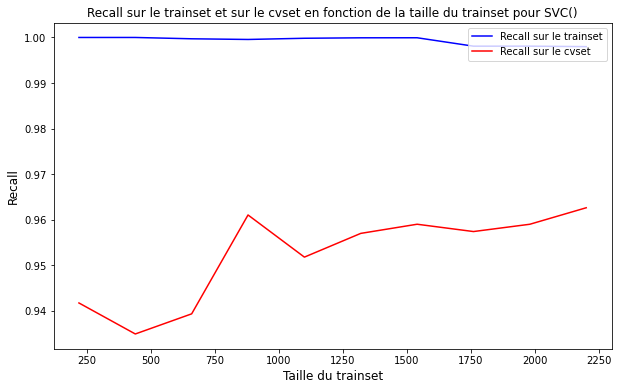

In [246]:
model = SVC() 
get_learning_curve(model, X_train_tfidf, y_train, cv_param, "recall", train_sizes, n_jobs)

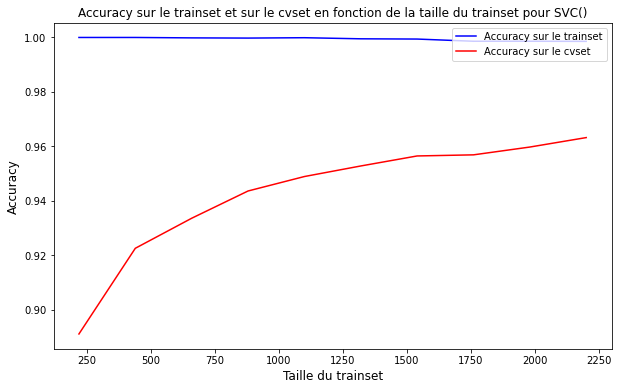

In [247]:
get_learning_curve(model, X_train_tfidf, y_train, cv_param, "accuracy", train_sizes, n_jobs)

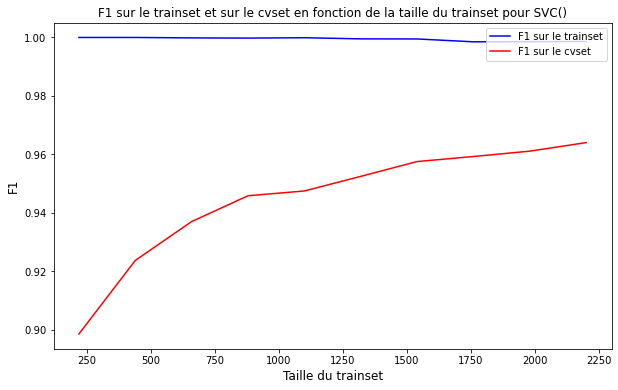

In [248]:
get_learning_curve(model, X_train_tfidf, y_train, cv_param, "f1", train_sizes, n_jobs)

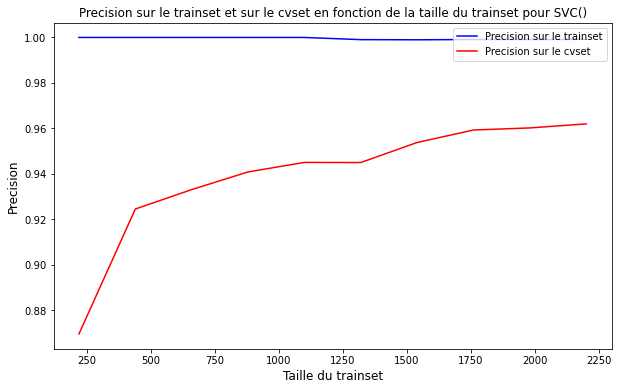

In [249]:
get_learning_curve(model, X_train_tfidf, y_train, cv_param, "precision", train_sizes, n_jobs)

In [8]:
# entrainement du modele
from sklearn.svm import SVC
# model = MultinomialNB()

model = SVC()
model.fit(X_train_tfidf, y_train)

SVC()

In [9]:
# test du modele
X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_pred = model.predict(X_test_tfidf)
print(y_pred)
print(X_test.shape)
print(X_test_tfidf.shape)

[0 0 0 ... 0 0 1]
(1204,)
(1204, 9603)


C:\Users\eupho\AppData\Local\Temp/ipykernel_13928/2510564835.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels([false_label, true_label], Fontsize=font_size + 3)
C:\Users\eupho\AppData\Local\Temp/ipykernel_13928/2510564835.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_yticklabels([false_label, true_label], Fontsize=font_size + 3)


Text(69.0, 0.5, 'Catégories réelles')

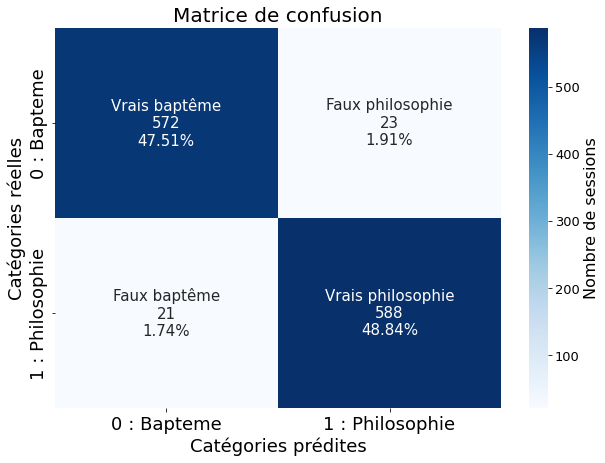

In [10]:
# Matrice de confusion
false_label = "0 : Bapteme"
true_label = "1 : Philosophie"
confusion_matrix_var = confusion_matrix(y_test, y_pred, labels=model.classes_)
group_names = ["Vrais baptême", "Faux philosophie", "Faux baptême", "Vrais philosophie"]
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix_var.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix_var.flatten()/np.sum(confusion_matrix_var)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
font_size = 15 #19
plt.rcParams["figure.figsize"] = (10, 7) #taille du graphique, taille du plot
ax = sb.heatmap(confusion_matrix_var, 
                annot=labels, fmt="", cmap='Blues',
                annot_kws={"size": font_size}, 
                cbar_kws={'label': 'Nombre de sessions'})
ax.set_xticklabels([false_label, true_label], Fontsize=font_size + 3)
ax.set_yticklabels([false_label, true_label], Fontsize=font_size + 3)
ax.figure.axes[-1].yaxis.label.set_size(font_size + 1)
ax.figure.axes[-1].tick_params(labelsize=font_size - 2) 
plt.title("Matrice de confusion", fontsize = font_size + 5)
# xlabel = 'Catégories prédites\n\n Exactitude (bien classés) = {:0.2f} % ; Inexactitude (mal classés) = {:0.2f} %\n Précision (bonnes prédictions de robots / qualité) = {:0.2f} %\n Rappel (nombre de robots détectés / quantité) = {:0.2f} %\n F1 (synthèse de précision + rappel) = {:0.2f} %'.format(accuracy, (100 - accuracy), precision, recall, f1_score)
plt.xlabel("Catégories prédites", fontsize=font_size + 3)
plt.ylabel("Catégories réelles", fontsize=font_size + 3)

In [12]:
# Metriques
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       587
           1       0.96      0.94      0.95       617

    accuracy                           0.95      1204
   macro avg       0.95      0.95      0.95      1204
weighted avg       0.95      0.95      0.95      1204



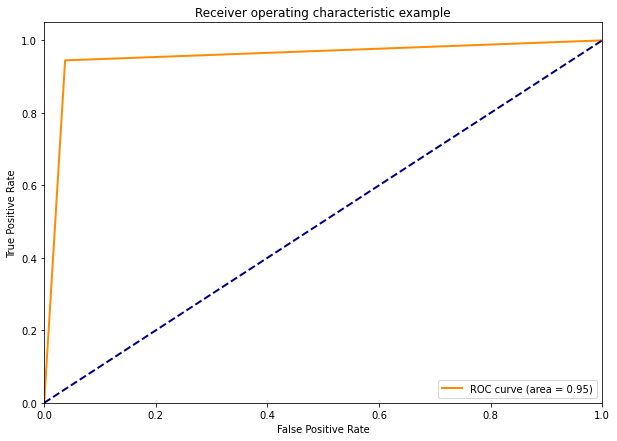

In [13]:
# Courbe ROC et AUC
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [14]:
# On affiche les documents a propos desquels le modele s'est trompe
corpus_test = pd.DataFrame({"id":corpus.iloc[indices_test].id, "message": corpus.iloc[indices_test].message, "truth":y_test, "pred":y_pred})
corpus_test_errors = corpus_test.query("truth != pred")
print(corpus_test.shape)
print(corpus_test_errors.shape)
# corpus_test_errors = corpus_test_errors[["truth", "pred", "message_preprocessed"]]
print(corpus_test_errors.columns)
corpus_test_errors = corpus_test_errors[["id", "truth", "pred", "message"]]
# corpus_test_errors

(1204, 4)
(56, 4)
Index(['id', 'message', 'truth', 'pred'], dtype='object')


In [15]:
with pd.option_context("display.max_rows", 1000):
    display(corpus.iloc[corpus_test_errors[corpus_test_errors["pred"] == 1].id]) #aux philosophie

,id,message,message_preprocessed,category,length,category_bin
1044,1044,"Bonjour Maxime N. George, Merci pour votre réponse et le temps pris pour expliciter votre pensée. Je n’abonde pas dans votre conception pour la simple et bonne raison que Jésus qualifie(dans les versets précités), le remariage de moichao. (Un autre terme qui mérite des éclaircissements bien particuliers) Le moichao ici c’est la violation du lien marital époux/épouse, lien jugé indissoluble du vivant des conjoints et qui n’est dissout que par la mort d’un des conjoints. On ne peut parler de moichao que dans le cadre de couples véritablement mariés qui se séparent et se remarient avec autrui et non de couples fiancés. En effet, la partie du couple marié qui répudie et se remarie commet un moichao et quiconque se marie avec un membre de ce couple séparé commet un moichao. Notons que l’emphase n’est pas mis sur le caractère sexuel mais sur l’alliance en mariage. Ce point capital donné dans ces versets qui comportent la clause d’exception montre bien qu’il ne s’agissait pas de fiançailles(couples fiancés) où l’on pouvait se permettre de rompre sans porter atteinte au lien marital, mais bien de couples véritablement mariés puisque tout remariage en cas de répudiation dans ces couples serait moichao. Bien à vous !",bonjour maxime george merci réponse temps pris expliciter pensée abonde conception simple bonne raison jésus qualifiedans verset précités remariage moichao autre terme mérite éclaircissement bien particulier moichao ici violation lien marital épouxépouse lien jugé indissoluble vivant conjoint dissout mort conjoint peut parler moichao cadre couple véritablement marié séparent remarient autrui non couple fiancé effet partie couple marié répudie remarie commet moichao quiconque marie membre couple séparé commet moichao notons emphase mis caractère sexuel alliance mariage point capital donné verset comportent clause exception montre bien agissait fiançaillescouples fiancé où pouvait permettre rompre sans porter atteinte lien marital bien couple véritablement marié puisque tout remariage cas répudiation couple moichao bien,baptism,1238,0
93,93,"Je ne vois pas en quoi ne pas clore un débat serait une preuve de sagesse. Un désaccord et un refus de trancher n’est pas un signe de sagesse, surtout quand le débat est « récent » dans l’histoire de l’Église. Ce qu’il faut regarder, ce sont les arguments et non pas le fait qu’il y ait tel ou tel théologien de chaque côté. La diversité d’opinion et la qualification des personnes de chaque côté du débat ne nous apprend pas que nous ne pouvons pas trouver la solution mais nous apprend que 1) il est difficile de la trouver, il faut étudier sérieusement et 2) il a plusieurs fausses routes à éviter et il faut donc être prudent lors de notre étude. Mais difficulté ne veut pas dire impossibilité. Face à la difficulté, il y a deux attitudes possibles : la persévérance, motivée par l’amour de la vérité ou la résignation du sceptique, empreinte de doute.",vois quoi clore débat preuve sagesse désaccord refus trancher signe sagesse surtout quand débat « récent » histoire église faut regarder argument non fait tel tel théologien chaque côté diversité opinion qualification personne chaque côté débat apprend pouvons trouver solution apprend difficile trouver faut étudier sérieusement a plusieurs faux route éviter faut donc être prudent lors étude difficulté veut dire impossibilité face difficulté a deux attitude possibles persévérance motivée amour vérité résignation sceptique empreinte doute,baptism,856,0
2861,2861,"Tu veux une vraie réponse venant de Dieu ? Arrête les livres, les études et va vers Dieu en prière et Dieu t’ouvrira les yeux ! Comme Il l’a fait pour moi ! Et là, et seulement là, tu mettras ta foi dans des réponses émanant de Dieu directement et non via tes propres forces, moyens, intelligences et pensées.",veux vraie réponse venant dieu arrête livre étude va ver dieu prière dieu ouvrira yeux comme a fait là seuleme

In [16]:
with pd.option_context("display.max_rows", 1000):
    display(corpus.iloc[corpus_test_errors[corpus_test_errors["pred"] == 0].id]) #faux bapteme

#faux exemples a enlever : commentaires, description auteur, texte anglais, references bibliographiques

,id,message,message_preprocessed,category,length,category_bin
109,109,"[1] _PRRD_ , 1:34. [2] “Reformed Theology of Scholasticism” in … 223. [3] _Introduction to Reformed Scholasticism_ , 76. [4] I _bid_., 112 .",prrd “ reformed theology of scholasticism ” in … introduction to reformed scholasticism i bid,philosophy,146,1
457,457,"> Tandis qu’il parlait ainsi, une femme éleva la voix du milieu de la foule et > lui dit : Heureux le ventre qui t’a porté et les seins qui t’ont allaité ! > Mais il répondit : Heureux plutôt ceux qui entendent la parole de Dieu et > qui l’observent ! > > Luc 11.27-28",tandis parlait ainsi femme éleva voix milieu foule dit heureux ventre a porté sein allaité répondit heureux plutôt ceux entendent parole dieu observent luc -,philosophy,271,1
184,184,Luc-Laurent Salvador sur 13 septembre 2019 à 6 h 01 min,luc-laurent salvador septembre heure min,philosophy,55,1
358,358,"Au moyen-âge, les universités balbutiantes avaient une façon particulière d’enseigner la théologie, qui n’est probablement pas sans valeur: une emphase très importante était mise sur le dialogue, où le professeur commençait par faire une lecture sur un sujet particulier, puis les étudiants étaient encouragés à penser « contre » la thèse soutenue, et à formuler des objections. Pourquoi Dieu ne serait-il pas infini par exemple? Puis, le professeur ou d’autres étudiants défendaient la thèse, et l’on retrouve cette dialectique dans la Summa, qui contribue à son immense clarté.",moyen-âge université balbutiantes façon particulière enseigner théologie probablement sans valeur emphase très importante mise dialogue où professeur commençait faire lecture sujet particulier puis étudiant encouragés penser « contre » thèse soutenue formuler objection pourquoi dieu serait-il infini exemple puis professeur autres étudiant défendaient thèse retrouve cette dialectique summa contribue immense clarté,philosophy,579,1
263,263,"Dieu est impliqué dans comment nous agissons à l’égard des autres humains, y compris ceux qui sont sous notre protection parce que c’est lui qui, à la base, m’a fait le don d’une épouse, et lui qui m’a fait le don de mes enfants. Si je maltraite mes enfants, j’insulte aussi celui qui m’en a fait le don, et c’est ainsi que l’honneur de Dieu est personnellement impliqué dans nos rapports avec nos semblables.",dieu impliqué comment agissons égard autres humains compris ceux sou protection parce base a fait don épouse a fait don enfant si maltraite enfant insulte aussi celui a fait don ainsi honneur dieu personnellement impliqué rapport semblable,philosophy,409,1
2420,2420,"La Glose est une sorte de commentaire biblique officiel du moyen-âge. Elle se présente sous la forme d’un verset de l’évangile suivi d’un commentaire plus ou moins long, comme un long récit entrelacé du texte biblique et de son commentaire. Souvent, ces commentaires sont des compilations de citations des pères de l’église.",glose sorte commentaire biblique officiel moyen-âge présente sou forme verset évangile suivi commentaire plus moins long comme long récit entrelacé texte biblique commentaire souvent commentaire compilation citation père église,philosophy,324,1
1558,1558,"Outre la méthode des _loci_ , les scolastiques réformés ont également utilisé la _disputatio_ (note : « controverse », ou « débat public »). Mais même les controverses étaient souvent organisées comme les _loci_. Les étudiants débattaient de théologie selon un ensemble de thèses, souvent organisées par le professeur pour qu’un étudiant se défende contre les attaques de ses adversaires. Des questions de type aristotélicien sont fréquemment utilisées pour ordonner la _disputatio_ (la technique de la _quaestio_ ). Ce sont donc ces types de questions qui structuraient les différents débats théologiques :",outre méthode locus scolastique réformé également utilisé disputatio note « controverse » « débat public » controverse souvent organisées comme locus étudiant débattaient théologie selon ensemble th

In [19]:
vocab

{1273: 'ceci',
 7689: 'réponds',
 5643: 'non',
 8026: 'seulement',
 2209: 'danger',
 2086: 'craindre',
 8841: 'très',
 8230: 'souvent',
 7818: 'salement',
 7565: 'réalisé',
 50: 'abus',
 853: 'autour',
 4147: 'image',
 3489: 'fin',
 5474: 'moyen',
 9315: 'âge',
 6990: 'raison',
 4847: 'laquelle',
 7609: 'réforme',
 836: 'aussi',
 9095: 'violemment',
 7184: 'rejeté',
 8700: 'tout',
 8932: 'usage',
 2980: 'encore',
 4035: 'hui',
 1301: 'certaines',
 6452: 'pratique',
 4827: 'laissent',
 6196: 'perplexes',
 8698: 'tous',
 5743: 'observateur',
 7512: 'romain',
 6340: 'point',
 5925: 'où',
 9575: 'évêque',
 3216: 'eux',
 5557: 'même',
 7097: 'reconnaissent',
 1311: 'cette',
 6384: 'possibilité',
 6941: 'quest',
 1272: 'ce',
 3364: 'exégétiquement',
 4767: 'justifie',
 8482: 'sépares',
 3743: 'gen',
 694: 'as',
 8846: 'tu',
 5043: 'lu',
 4799: 'kline',
 3752: 'genèse',
 7422: 'retour',
 5581: 'nature',
 2511: 'divine',
 3381: 'faire',
 44: 'abstraction',
 3099: 'entre',
 6202: 'personne',
 7

In [13]:
os.getcwd()

'c:\\Users\\eupho\\OneDrive\\Documents\\perso\\projets\\classification_texte_bapteme_philo'

In [14]:
# on affiche les poids des mots tfidf
n_words = X_train_tfidf.shape[1]
scores_tfidf = pd.DataFrame({"id":range(n_words), "words":tfidf_vectorizer.get_feature_names(), "idf":tfidf_vectorizer.idf_})
scores_tfidf = scores_tfidf.sort_values("idf", ascending=False)
print("moyenne des poids idf =", np.mean(scores_tfidf["idf"]))
print("ecart-type des poids idf =", np.std(scores_tfidf["idf"]))
with pd.option_context("display.max_rows", 100):
    display(scores_tfidf)
scores_tfidf.to_csv("./data/output/scores_tfidf_train.csv")

moyenne des poids idf = 7.53278235912601
ecart-type des poids idf = 0.8726060587971336


c:\Users\eupho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,id,words,idf
0,0,aaaayaajpgpadqthechildofthecovenantorhowchristianparentsshouldtrainuptheirhouseholds,8.107835
5349,5349,martyrhttpsparlafoifrjustin,8.107835
5371,5371,matures,8.107835
5366,5366,matin,8.107835
5364,5364,mathématiques,8.107835
...,...,...,...
1342,1342,cette,2.852947
6438,6438,plus,2.767896
1596,1596,comme,2.691734
9669,9669,être,2.678489


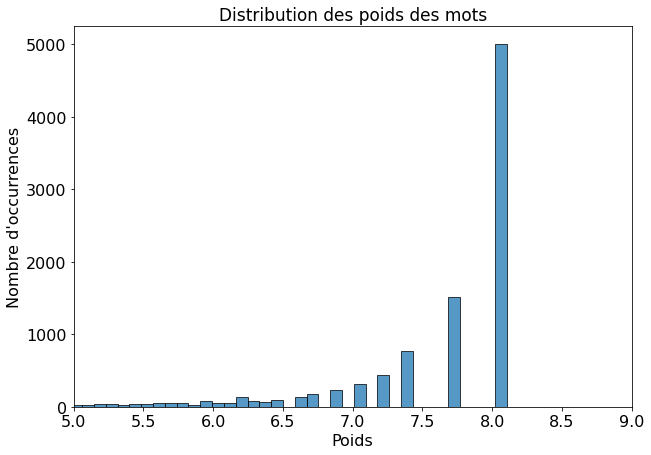

In [31]:
# Distribution des poids des mots (calcules avec sklearn)
path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution.png")
path = path.as_posix()

sb.histplot(data=scores_tfidf, x="idf")
# plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids des mots", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(5, 9)
plt.savefig(path)
plt.show()

In [218]:
print(X_train_tfidf)

  (0, 938)	0.14975249720900632
  (0, 1278)	0.25881951747805343
  (0, 3032)	0.1805577109558408
  (0, 3463)	0.1717749918572689
  (0, 3470)	0.3565672217787948
  (0, 4353)	0.3487267720443616
  (0, 4924)	0.2730398314020285
  (0, 6101)	0.3359443558741422
  (0, 6294)	0.14220352245898796
  (0, 6866)	0.29284888401567827
  (0, 6914)	0.2714250213113555
  (0, 6942)	0.48235376469227026
  (1, 1234)	0.35278539324581504
  (1, 1390)	0.24876277255825688
  (1, 2886)	0.35278539324581504
  (1, 3114)	0.3060842688820331
  (1, 5701)	0.5153104755176197
  (1, 5881)	0.34568776370052984
  (1, 6695)	0.4587695715785898
  (2, 3891)	0.32471570121808185
  (2, 4851)	0.4255660813517386
  (2, 5029)	0.37569788041498425
  (2, 5324)	0.33644098458013805
  (2, 7771)	0.5059853025118624
  (2, 7922)	0.4506558154221349
  :	:
  (2444, 2987)	0.1285927656688988
  (2444, 3178)	0.18937453585490432
  (2444, 3463)	0.15774127795882753
  (2444, 3876)	0.16371815429440134
  (2444, 4968)	0.13233731891410083
  (2444, 5146)	0.1731871613594009


In [39]:
# Calcul manuel des poids
print("X_train_tfidf.shape =", X_train_tfidf.shape)
words_weights = X_train_tfidf.sum(axis=0)
print("words_weights.shape =", words_weights.shape)
print(words_weights)
print(words_weights.shape)

X_train_tfidf.shape = (2442, 9800)
words_weights.shape = (1, 9800)
[[0.18132263 0.82982032 0.13992327 ... 0.12406083 0.06203041 0.29936291]]
(1, 9800)


In [40]:
words_weights = np.ravel(words_weights)
print(words_weights)
print(words_weights.shape)

[0.18132263 0.82982032 0.13992327 ... 0.12406083 0.06203041 0.29936291]
(9800,)


In [41]:
# words_weights[:10]
np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.unique(words_weights).shape
np.max(words_weights)
np.min(words_weights)
print("words_weights.shape =", words_weights.shape)
words_weights

words_weights.shape = (9800,)


array([0.181, 0.830, 0.140, ..., 0.124, 0.062, 0.299])

In [36]:
# scores_tfidf["manuel_weights"] = words_weights
print("corpus.shape =", corpus.shape)
print("scores_tfidf.shape =", scores_tfidf.shape)
scores_tfidf

corpus.shape = (3648, 6)
scores_tfidf.shape = (9494, 3)


,words,idf,manuel_weights
0,aaen,8.11,0.18
5200,markus,8.11,0.47
5192,marginalisation,8.11,0.14
5191,marginalisant,8.11,0.90
5190,marchons,8.11,0.18
...,...,...,...
3368,fait,2.89,6.29
6301,plus,2.78,0.14
9476,être,2.72,0.11
1580,comme,2.72,0.11


In [17]:
# Distribution des poids des mots (calcules avec a la main)
# Pour chaque phrase, y a-t-il beaucoup de mots qui ont ete trouves et qui ont influences positivement la prediction ?
path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution_manuel.png")
path = path.as_posix()

# sb.histplot(words_weights[:100000])
sb.histplot(words_weights)
# plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids des mots", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(0, 4)
plt.savefig(path)
plt.show()

NameError: name 'words_weights' is not defined

In [223]:
import plotly.express as px
fig = px.histogram(words_weights,
                 width=700, height=500,)
fig.update_traces(marker_line_width=1,marker_line_color="white")
fig.show() #bizarre verifier pourquoi valeurs changent en fonction du nombre de couleur presente ?

In [284]:
# Mots les plus importants pour chaque exemple (texte)
X_train_tfidf.shape
print(X_train_tfidf)

  (0, 7553)	0.12736993072182626
  (0, 2973)	0.18420232922971116
  (0, 8688)	0.07769596222035731
  (0, 9288)	0.1451209918900519
  (0, 8808)	0.12523458042091834
  (0, 1284)	0.10056829494798189
  (0, 6570)	0.14870020689325986
  (0, 6034)	0.13918469907169115
  (0, 2204)	0.18420232922971116
  (0, 6321)	0.1462593734323282
  (0, 688)	0.16401043460055387
  (0, 8563)	0.21759421620077085
  (0, 5715)	0.22036347092439054
  (0, 4881)	0.15606756293006602
  (0, 1006)	0.12423016274777288
  (0, 6038)	0.18420232922971116
  (0, 629)	0.12575195898555064
  (0, 6229)	0.18991689453382707
  (0, 1300)	0.10852894472950503
  (0, 1804)	0.18420232922971116
  (0, 8353)	0.2134530740217521
  (0, 8799)	0.4153359114041054
  (0, 1445)	0.20562875885077825
  (0, 6483)	0.11319808455680858
  (0, 3073)	0.14298564158914395
  :	:
  (2444, 4731)	0.23726729932602028
  (2444, 2884)	0.21045706853589452
  (2444, 6547)	0.21045706853589452
  (2444, 1149)	0.21698614266264657
  (2444, 8762)	0.17831219575319612
  (2444, 6433)	0.14818602

In [104]:
# scores_tfidf.sort_index(inplace=True)
scores_tfidf


,words,idf
0,aaen,8.11
5200,markus,8.11
5192,marginalisation,8.11
5191,marginalisant,8.11
5190,marchons,8.11
...,...,...
3368,fait,2.89
6301,plus,2.78
9476,être,2.72
1580,comme,2.72


In [51]:
print(X_train_tfidf)

  (0, 540)	0.19922311655296568
  (0, 838)	0.11338218934236612
  (0, 1315)	0.1857414263565728
  (0, 1426)	0.0994965486065249
  (0, 1992)	0.2590139085079784
  (0, 2158)	0.3235260583123609
  (0, 2358)	0.2104879850367319
  (0, 2566)	0.09349270865326209
  (0, 3273)	0.214731644731936
  (0, 3771)	0.2590139085079784
  (0, 5620)	0.14454591719986595
  (0, 5998)	0.2823607933210237
  (0, 6356)	0.1946520604465617
  (0, 6603)	0.29762259455633333
  (0, 6802)	0.3029054211707166
  (0, 6804)	0.1946520604465617
  (0, 7812)	0.20455930867016056
  (0, 7896)	0.12931157869733712
  (0, 8304)	0.2460621766299646
  (0, 8618)	0.09331375635791654
  (0, 8619)	0.2409365180168398
  (0, 9228)	0.149841802811808
  (1, 1757)	0.18867038933464358
  (1, 2087)	0.38606941991303856
  (1, 3371)	0.2070404541068958
  :	:
  (2442, 2213)	0.21758767934673987
  (2442, 2358)	0.09207141146038665
  (2442, 2909)	0.34083795810915696
  (2442, 3470)	0.20938259892550903
  (2442, 4024)	0.17675817009110037
  (2442, 4065)	0.16241046303052797
  (

In [116]:
scores_tfidf.head()

,id,words,idf
0,0,aaen,8.11
5200,5200,markus,8.11
5192,5192,marginalisation,8.11
5191,5191,marginalisant,8.11
5190,5190,marchons,8.11


In [33]:
threshold_score = 4.5
col_top_words = [] #liste des top words pour chaque exemple du corpus (partie train)

In [36]:
# Exemple pour une seule ligne (un seul exemple)
#Return the indices and values of the nonzero elements of a matrix
from scipy.sparse import csr_matrix, find
# print("X_train_tfidf.shape =", X_train_tfidf.shape)
id_loc = 0 #id dans le ndarray X_train (qui correspond ligne a ligne a indices_train)
id_glob = indices_train.iloc[id_loc] #id dans le dataframe corpus
# print("id_exemple =", id_exemple)
extract = X_train_tfidf[:(id_loc + 1),:]
#  type(find(extract)[0])
_, words_indices, words_weights = find(extract)
# words_indices = [int(e) for e in words_indices]
print("corpus.iloc[id_glob].message =", corpus.iloc[id_glob].message)
df_best_words = scores_tfidf.iloc[words_indices].sort_values("idf", ascending=False).query("idf > @threshold_score")
df_best_words["words_with_score"] = df_best_words["words"] + " (" + df_best_words["idf"].round(2).astype(str) + ")"
df_best_words
top_words = list(df_best_words["words_with_score"])
top_words = ", ".join(word for word in top_words)
col_top_words.append(top_words)
# print(type(top_words))
print(col_top_words)

corpus.iloc[id_glob].message = Toutefois, je juge qu’il ne répond pas de façon satisfaisante à l’étude de l’ensemble des cas de baptême qui révèle un motif récurrent : à chaque fois qu’une famille est présente, elle est baptisée. Il faut un présupposé baptiste (que nous questionnons justement) pour dire que tous avaient cru.
['satisfaisante (7.7), récurrent (7.7), questionnons (7.7), motif (7.41), juge (6.72), révèle (6.72), justement (6.32), répond (5.97), cru (5.91), chaque (5.58), présente (5.54), présupposé (5.51), toutefois (5.47), ensemble (5.43), étude (5.16)', 'satisfaisante (7.7), récurrent (7.7), questionnons (7.7), motif (7.41), juge (6.72), révèle (6.72), justement (6.32), répond (5.97), cru (5.91), chaque (5.58), présente (5.54), présupposé (5.51), toutefois (5.47), ensemble (5.43), étude (5.16)']


In [34]:
scores_tfidf.sort_values("words", inplace=True) #remet les lignes dans l'ordre alphabetique (ordre par defaut)
# print(list(scores_tfidf.iloc[words_indices].words))
threshold_score = 4.5
with pd.option_context("display.max_rows", 1000):
    # display(scores_tfidf.iloc[words_indices].sort_values("idf", ascending=False))
    display(scores_tfidf.iloc[words_indices].sort_values("idf", ascending=False).query("idf > @threshold_score"))

,id,words,idf
8070,8070,satisfaisante,7.70
7799,7799,récurrent,7.70
7157,7157,questionnons,7.70
5645,5645,motif,7.41
4909,4909,juge,6.72
7962,7962,révèle,6.72
4931,4931,justement,6.32
7880,7880,répond,5.97
2208,2208,cru,5.91
1387,1387,chaque,5.58


In [155]:
print(len(X_train))
print((X_train.shape)[0])
print(indices_train.shape)

2444
2444
(2444,)


In [163]:
# scores_tfidf.sort_values("idf", ascending=False, inplace=True)
# scores_tfidf
scores_tfidf.iloc[words_indices].query("idf > @threshold_score")

,id,words,idf
5192,5192,marginalisation,8.11
5174,5174,manquant,8.11
5174,5174,manquant,8.11
5174,5174,manquant,8.11
5173,5173,manquait,8.11
...,...,...,...
9228,9228,âme,4.69
9228,9228,âme,4.69
9228,9228,âme,4.69
9228,9228,âme,4.69


In [62]:
print(X_train_tfidf)

  (0, 977)	0.1421901990854474
  (0, 983)	0.14301505712367568
  (0, 985)	0.10711037515108501
  (0, 1277)	0.15213065435483353
  (0, 1387)	0.20335430873866117
  (0, 2208)	0.21532160468544556
  (0, 2489)	0.11762515167958265
  (0, 3169)	0.19794741639164856
  (0, 3521)	0.1551061583676395
  (0, 3540)	0.15107464784712699
  (0, 3546)	0.14744516525728943
  (0, 3644)	0.11976449468301144
  (0, 4909)	0.24486352780104811
  (0, 4931)	0.23009256624324684
  (0, 5645)	0.27011465336822765
  (0, 6947)	0.20192551095884798
  (0, 6974)	0.20055064312764428
  (0, 7157)	0.28059481737760594
  (0, 7799)	0.28059481737760594
  (0, 7880)	0.21740386704699394
  (0, 7962)	0.24486352780104811
  (0, 8070)	0.28059481737760594
  (0, 8900)	0.12513614955479627
  (0, 8903)	0.1992257817197115
  (0, 9741)	0.18810082789316643
  :	:
  (2441, 2436)	0.19068396854248973
  (2441, 2489)	0.09398724417278917
  (2441, 2492)	0.16248830115070434
  (2441, 2535)	0.17047682284179172
  (2441, 2596)	0.26339463295750437
  (2441, 2653)	0.08517378

In [63]:
tfidf_vectorizer.vocabulary_

{'toutefois': 8903,
 'juge': 4909,
 'répond': 7880,
 'façon': 3546,
 'satisfaisante': 8070,
 'étude': 9741,
 'ensemble': 3169,
 'cas': 1277,
 'baptême': 985,
 'révèle': 7962,
 'motif': 5645,
 'récurrent': 7799,
 'chaque': 1387,
 'foi': 3644,
 'famille': 3521,
 'présente': 6947,
 'baptisé': 983,
 'faut': 3540,
 'présupposé': 6974,
 'baptiste': 977,
 'questionnons': 7157,
 'justement': 4931,
 'dire': 2489,
 'tous': 8900,
 'cru': 2208,
 'lune': 5244,
 'caractéristique': 1258,
 'scolastique': 8121,
 'réformée': 7823,
 'utilisation': 9154,
 'distinction': 2571,
 'réformé': 7822,
 'hérité': 4220,
 'cette': 1346,
 'méthode': 5731,
 'théologique': 8834,
 'moyen': 5657,
 'âge': 9535,
 'catholique': 1290,
 'romain': 7726,
 'luthérien': 5253,
 'théologien': 8833,
 'remonstrants': 7455,
 'également': 9601,
 'utilisé': 9160,
 'présenter': 6949,
 'propre': 6828,
 'théologie': 8832,
 'mot': 5643,
 'terme': 8769,
 'ambigu': 391,
 'retrouvent': 7645,
 'souvent': 8429,
 'discours': 2520,
 'nécessite': 5

In [26]:
# print(X_train_tfidf.toarray())
print(np.argsort(X_train_tfidf.toarray(), axis=1))
aa = np.argsort(X_train_tfidf.toarray(), axis=1)

print("aa.shape =", aa.shape)
print("aa[0,:].shape =", aa[0,:].shape)

# with np.printoptions(threshold=np.inf):
#     print(aa[0,:])

# values, counts = np.unique(aa[0,:], return_counts=True) #retourne des numpy.ndarray 
# np.asarray((values, counts)).T

[[   0 6389 6390 ... 4147 8841   50]
 [   0 6397 6398 ... 8846 3364 8482]
 [   0 6396 6397 ... 6202 2511 5581]
 ...
 [   0 6392 6393 ... 2104 3719 3404]
 [   0 6395 6396 ...  805 2016 1163]
 [   0 6397 6398 ... 3458 6164 3159]]
aa.shape = (2442, 9603)
aa[0,:].shape = (9603,)


In [18]:
tfidf_vectorizer.idf_

array([7.70236978, 8.10783489, 8.10783489, ..., 8.10783489, 8.10783489,
       8.10783489])

In [27]:
# vocab.keys()

In [25]:
vocab = tfidf_vectorizer.vocabulary_
# vocab.keys()

In [29]:
scores_tfidf

,id,words,idf
4801,4801,klinehttpwwwetsjetsorgfilesjets,8.107835
5279,5279,menace,8.107835
5305,5305,merveilleuse,8.107835
5304,5304,merit,8.107835
5301,5301,mercy,8.107835
...,...,...,...
1311,1311,cette,2.847739
6330,6330,plus,2.784825
1571,1571,comme,2.718763
9578,9578,être,2.665417


In [7]:
# vocab_idf = 
keys_list = scores_tfidf["words"]
values_list = scores_tfidf["idf"]
vocab_idf = dict(zip(keys_list, values_list))
vocab_idf

{'aaaayaajpgpadqthechildofthecovenantorhowchristianparentsshouldtrainuptheirhouseholds': 8.107834890697795,
 'martyrhttpsparlafoifrjustin': 8.107834890697795,
 'matures': 8.107834890697795,
 'matin': 8.107834890697795,
 'mathématiques': 8.107834890697795,
 'mathàeuò': 8.107834890697795,
 'mathsinfo': 8.107834890697795,
 'maths': 8.107834890697795,
 'mathieu': 8.107834890697795,
 'massif': 8.107834890697795,
 'massicotte': 8.107834890697795,
 'martèle': 8.107834890697795,
 'martyn': 8.107834890697795,
 'matérialisait': 8.107834890697795,
 'marteler': 8.107834890697795,
 'marmonnant': 8.107834890697795,
 'marmonant': 8.107834890697795,
 'markus': 8.107834890697795,
 'maritain': 8.107834890697795,
 'marine': 8.107834890697795,
 'marin': 8.107834890697795,
 'marier': 8.107834890697795,
 'marge': 8.107834890697795,
 'marchons': 8.107834890697795,
 'maturité': 8.107834890697795,
 'matérialiste': 8.107834890697795,
 'marchand': 8.107834890697795,
 'melanchthon': 8.107834890697795,
 'meredithh

In [50]:
b = np.array([1,3,5,2])
print(a)
# print(a[::-1])
print(np.flip(a, axis=1))

[[1 3 3]
 [7 2 5]
 [3 3 5]]
[[3 3 1]
 [5 2 7]
 [5 3 3]]


In [54]:
feature_names = tfidf_vectorizer.get_feature_names_out()
X_train_tfidf_arr = X_train_tfidf.toarray()
df_train_tfidf = pd.DataFrame(X_train_tfidf_arr, columns = feature_names)
idx_vocab = np.argsort(X_train_tfidf_arr, axis=1)
vocab = tfidf_vectorizer.vocabulary_
vocab_inv = {v: k for k, v in vocab.items()}
idx_top_words = idx_vocab[:,-10:]
idx_top_words = np.flip(idx_top_words, axis=1)
# with np.printoptions(threshold=np.inf):
#     print(np.around(np.take_along_axis(X_train_tfidf_arr, idx_top_words, axis=1), 3))

In [57]:
col_top_words = []
# col_idf = []
for row in idx_top_words:
    # print("row =", row)
    doc_top_words = []
    for idx_word in row:
        word = vocab_inv[idx_word]
        # print("word =", word)
        doc_top_words.append(word)
        # doc_top_words.append(word + " (" + str(round(vocab_idf[word], 2)) + ")")
    col_top_words.append(doc_top_words)
df_train_tfidf["top_words"] = col_top_words
df_train_tfidf

,aaaayaajpgpadqthechildofthecovenantorhowchristianparentsshouldtrainuptheirhouseholds,aaen,aaron,ab,abaissé,abandonne,abandonné,aben,abjuré,ablution,...,œil,œuvrant,œuvre,œuvres,œuvreshttpsparlafoifrlalliance,εις,πάντα,τὰ,ἔθνη,top_words
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
2438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
2439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
2440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]


In [12]:
df_train_tfidf

,aaaayaajpgpadqthechildofthecovenantorhowchristianparentsshouldtrainuptheirhouseholds,aaen,aaron,ab,abaissé,abandonne,abandonné,aben,abjuré,ablution,...,œil,œuvrant,œuvre,œuvres,œuvreshttpsparlafoifrlalliance,εις,πάντα,τὰ,ἔθνη,top_words
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[aaaayaajpgpadqthechildofthecovenantorhowchristianparentsshouldtrainuptheirhouseholds (8.11), pli (8.11), plonger (8.11), plongé (7.7), pluie (8.11), plume (8.11), plupart (6.24), pleinement (5.54), pluraliste (8.11), plutôt (4.95), plénitude (6.5), plûme (8.11), podcast (8.11), podcasthttpswwwleboncombatfrcalviniste (8.11), poids (8.11), pluriel (8.11), pleine (6.4), plein (6.72), plea (7.7), plaide (7.7), plaider (8.11), plaie (8.11), plaisent (8.11), plaisir (6.5), plait (8.11), plan (5.54), plante (7.41), planté (8.11), planète (7.7), platinga (8.11), platon (8.11), platonisme (8.11), plausible (8.11), plaçait (8.11), poignet (8.11), poil (7.7), pointait (8.11), pointe (7.41), portant (8.11), porte (6.4), portent (7.41), porter (7.19), porterez (8.11), porteront (8.11), porteur (8.11), porteuse (8.11), portion (8.11), portrait (8.11), porté (7.41), portée (7.01), posais (8.11), posant (8.11), pose (6.6), pornographe (8.11), plaidant (8.11), porneia (7.41), populaire (7.19), pointent (7.41), pointillés (8.11), poison (8.11), poitiers (8.11), polanus (8.11), polhill (8.11), politics (8.11), politique (5.97), politologie (8.11), polity (8.11), polycarpe (7.41), polémique (8.11), ponctuer (8.11), pontificat (8.11), pool (8.11), porc (7.41), posent (8.11), placées (8.11), placé (7.01), ph (7.7), pharaon (7.01), pharisaïque (8.11), pharisien (7.01), phase (8.11), pheasant (8.11), peyrat (8.11), philadelphia (8.11), phileo (8.11), philippe (7.41), philippes (7.7), philippiens (7.7), philippine (8.11), philistin (8.11), philemon (8.11), peux (6.5), peuvent (4.78), peut (3.16), pertinent (7.41), pertinente (6.5), pertinents (8.11), pervers (8.11), perçue (8.11), perçus (8.11), ...]"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[aaaayaajpgpadqthechildofthecovenantorhowchristianparentsshouldtrainuptheirhouseholds (8.11), point (4.14), pointait (8.11), pointe (7.41), pointent (7.41), pointillés (8.11), poison (8.11), poil (7.7), poitiers (8.11), polhill (8.11), politics (8.11), politique (5.97), politologie (8.11), polity (8.11), polycarpe (7.41), polanus (8.11), poignet (8.11), poids (8.11), podcasthttpswwwleboncombatfrcalviniste (8.11), pleinement (5.54), pli (8.11), plonger (8.11), plongé (7.7), pluie (8.11), plume (8.11), plupart (6.24), pluraliste (8.11), pluriel (8.11), plus (2.77), plusieurs (4.97), plutôt (4.95), plénitude (6.5), plûme (8.11), podcast (8.11), polémique (8.11), ponctuer (8.11), pontificat (8.11), pool (8.11), posent (8.11), poser (6.03), posera (8.11), positif (7.7), position (4.95), positionnement (8.11), positive (8.11), positivement (6.86), positives (7.7), posons (7.7), possession (7.41), possibilité (6.72), possible (4.93), possiblement (8.11), possibles (6.4), pose (6.6), pleine (6.4), posant (8.11), portée (7.01), populaire (7.19), porc (7.41), porneia (7.41), pornographe (8.11), portant (8.11), porte (6.4), portent (7.41), porter (7.19), porterez (8.11), porteront (8.11), porteur (8.11), porteuse (8.11), portion (8.11), portrait (8.11), porté (7.41), posais (8.11), plein (6.72), plea (7.7), plaçait (8.11), philosophical (8.11), philosophie (5.67), philosophique (6.4), philosophiquement (8.11), philosophiques (6.5), philosophy (7.41), photin (7.7), php (8.11), phrase (6.6), physicien (7.7), physique (5.91), physiquement (7.7), phénomène (7.7), phénoménale (8.11), phérésiens (8.11), philosopherisme (8.11), pi (7.7), philosophe (6.32), philistin (8.11), peux (6.5), peyrat (8.11), ph (7.7), pharaon (7.01), pharisaïque (8.11), ...]"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[aaaayaajpgpadqthechildofthecovenantorhowch

In [38]:
# Exemple pour toutes les lignes (un seul exemple)
#Return the indices and values of the nonzero elements of a matrix
from scipy.sparse import csr_matrix, find
# print("X_train_tfidf.shape =", X_train_tfidf.shape)

for id_loc in range(len(X_train)):
    print("etape = {} %".format(id_loc / len(X_train)))
    # id_loc = 0 #id dans le ndarray X_train (qui correspond ligne a ligne a indices_train)
    # id_glob = indices_train.iloc[id_loc] #id dans le dataframe corpus
    # print("id_exemple =", id_exemple)
    extract = X_train_tfidf[:(id_loc + 1),:]
    #  type(find(extract)[0])
    _, words_indices, words_weights = find(extract)
    # words_indices = [int(e) for e in words_indices]
    # corpus.iloc[id_glob].message
    # df_best_words = scores_tfidf.iloc[words_indices].query("idf > @threshold_score")
    df_best_words = scores_tfidf.iloc[words_indices]
    # df_best_words["words_with_score"] = df_best_words["words"] + " (" + df_best_words["idf"].round(2).astype(str) + ")"
    # df_best_words.assign(words_with_score=df_best_words.words + " (" + df_best_words.idf.round(2).map(str) + ")")
    df_best_words['words_with_score'] = [x + " (" + str(y) + ")" for x, y in zip(df_best_words['words'], df_best_words['idf'])]

    # df_best_words
    top_words = list(df_best_words["words_with_score"])
    top_words = ", ".join(word for word in top_words)
    col_top_words.append(top_words)
    # print(type(top_words))
    # print(col_top_words)

etape = 0.0 %
etape = 0.0004095004095004095 %
etape = 0.000819000819000819 %
etape = 0.0012285012285012285 %
etape = 0.001638001638001638 %
etape = 0.0020475020475020475 %
etape = 0.002457002457002457 %
etape = 0.0028665028665028664 %
etape = 0.003276003276003276 %
etape = 0.0036855036855036856 %
etape = 0.004095004095004095 %
etape = 0.0045045045045045045 %
etape = 0.004914004914004914 %
etape = 0.005323505323505323 %
etape = 0.005733005733005733 %
etape = 0.006142506142506142 %
etape = 0.006552006552006552 %
etape = 0.006961506961506962 %
etape = 0.007371007371007371 %
etape = 0.007780507780507781 %
etape = 0.00819000819000819 %
etape = 0.0085995085995086 %
etape = 0.009009009009009009 %
etape = 0.009418509418509418 %
etape = 0.009828009828009828 %
etape = 0.010237510237510237 %
etape = 0.010647010647010647 %
etape = 0.011056511056511056 %
etape = 0.011466011466011465 %
etape = 0.011875511875511875 %
etape = 0.012285012285012284 %
etape = 0.012694512694512694 %
etape = 0.013104013104

KeyboardInterrupt: 